In [1]:
import seaborn
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from collections import Counter

try:
    import constants as c
except ImportError:
    c = None
    raise ImportError('constants' + ' not imported')

try:
    import visualisation_fn as v
except ImportError:
    c = None
    raise ImportError('visualisation_fn' + ' not imported')

from data_format import *

/!\ Suivant l'utilisation, vous pouvez changer la langue dans le fichier 'constants'

In [2]:
N_MOST_COMMON = c.N_MOST_COMMON
MODEL_NAME = c.MODEL_NAME

# Exemple sur un paragraphe extrait par le mt5

In [3]:
paragraph_1 = "Nikola Tesla  was a Serbian-American inventor, electrical engineer, mechanical engineer, and futurist best known for his contributions to the design of the modern alternating current (AC) electricity supply system."

In [4]:
paragraph_2 = " Born and raised in the Austrian Empire, Tesla studied engineering and physics in the 1870s"

In [5]:
context_1 = Context(text = paragraph_1)

In [6]:
context_2 = Context(text = paragraph_2)

In [7]:
list_contexts = [context_1, context_2]

In [8]:
question = Question(retrieved_contexts = list_contexts)

In [9]:
t_p = v.TextProcessing(retrieved_contexts = question.retrieved_contexts)

on load la liste des sequences dans l'objet TextProcessing

In [10]:
t_p.load()

In [11]:
t_p.prepare()

In [12]:
t_p.text[:15]

'nikola tesla  w'

In [13]:
t_p.text_split[:15]

['nikola',
 'tesla',
 'was',
 'a',
 'serbian',
 'american',
 'inventor',
 'electrical',
 'engineer',
 'mechanical',
 'engineer',
 'and',
 'futurist',
 'best',
 'known']

# Fréquences

In [14]:
sorted_cardinalities = v.cardinality_of_words(t_p.text_split)

In [15]:
common_words = list(sorted_cardinalities.items())[:N_MOST_COMMON]

In [16]:
common_words[:15]

[('the', 4),
 ('and', 3),
 ('tesla', 2),
 ('engineer', 2),
 ('in', 2),
 ('nikola', 1),
 ('was', 1),
 ('a', 1),
 ('serbian', 1),
 ('american', 1),
 ('inventor', 1),
 ('electrical', 1),
 ('mechanical', 1),
 ('futurist', 1),
 ('best', 1)]

In [17]:
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

## Premier affichage

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

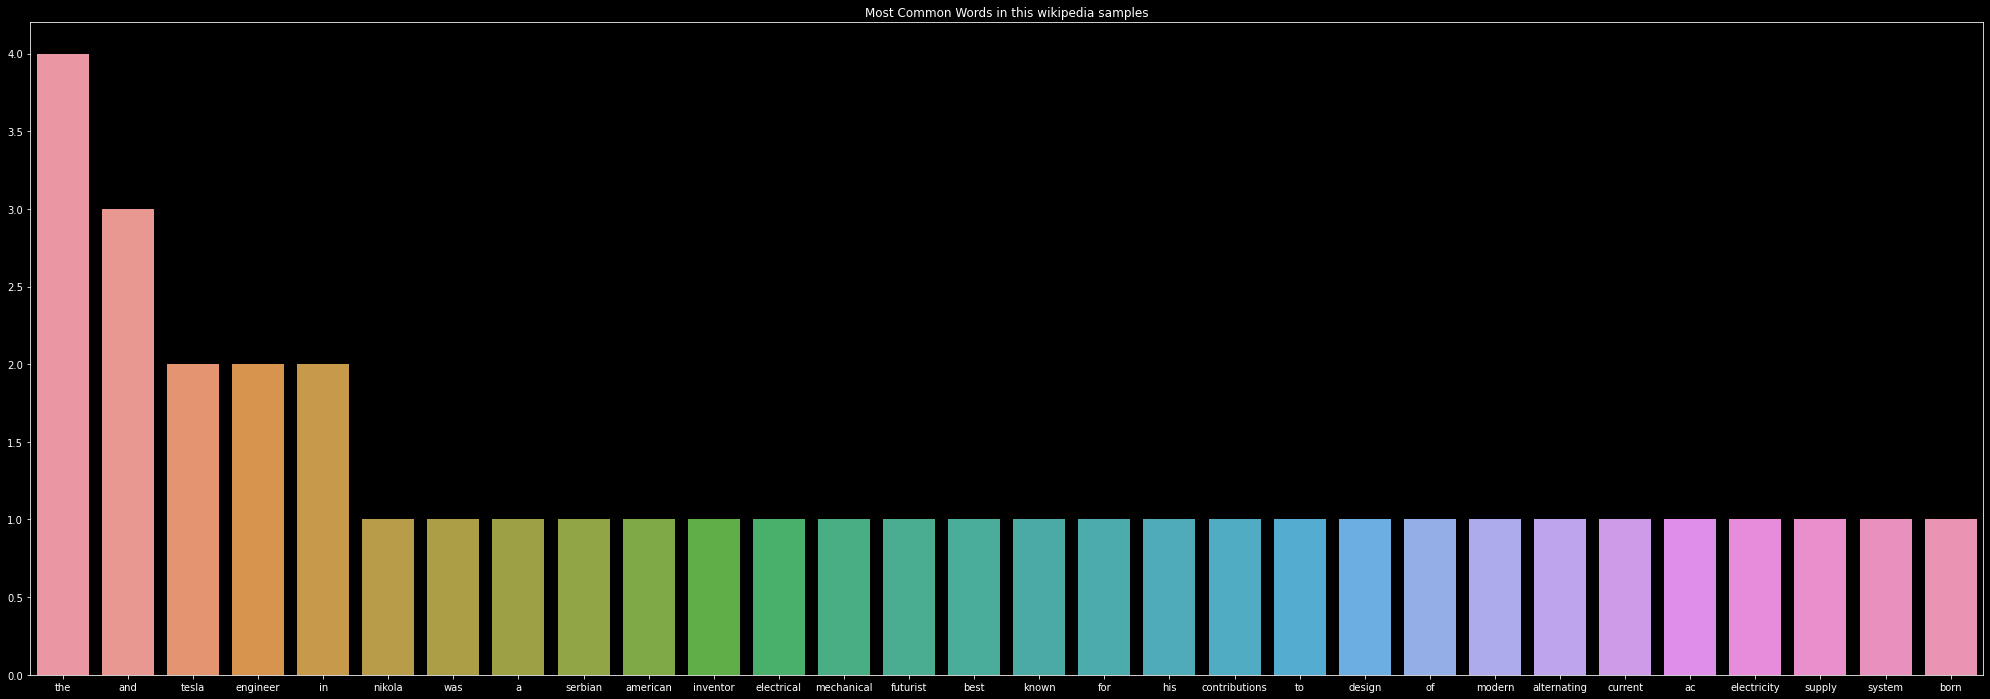

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(35, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

On voit que 'the', est le mot le plus utilisé. Cela semble logique, mais ce n'est pas très instructif sur le contexte étudié...

Nous allons donc supprimer ces "stopwords"

## Suppression des stopwords avec nltk

In [19]:
text_without_stopwords = t_p.without_stopwords()

In [20]:
text_without_stopwords[:6]

['nikola', 'tesla', 'serbian', 'american', 'inventor', 'electrical']

pour plus d'efficacité on utilise la fonction Counter de Collection

In [21]:
cardinalities = Counter(text_without_stopwords)

In [22]:
words = [cardinality[0] for cardinality in cardinalities.most_common(N_MOST_COMMON)]
counts = [cardinality[1] for cardinality in cardinalities.most_common(N_MOST_COMMON)]

## Second affichage

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

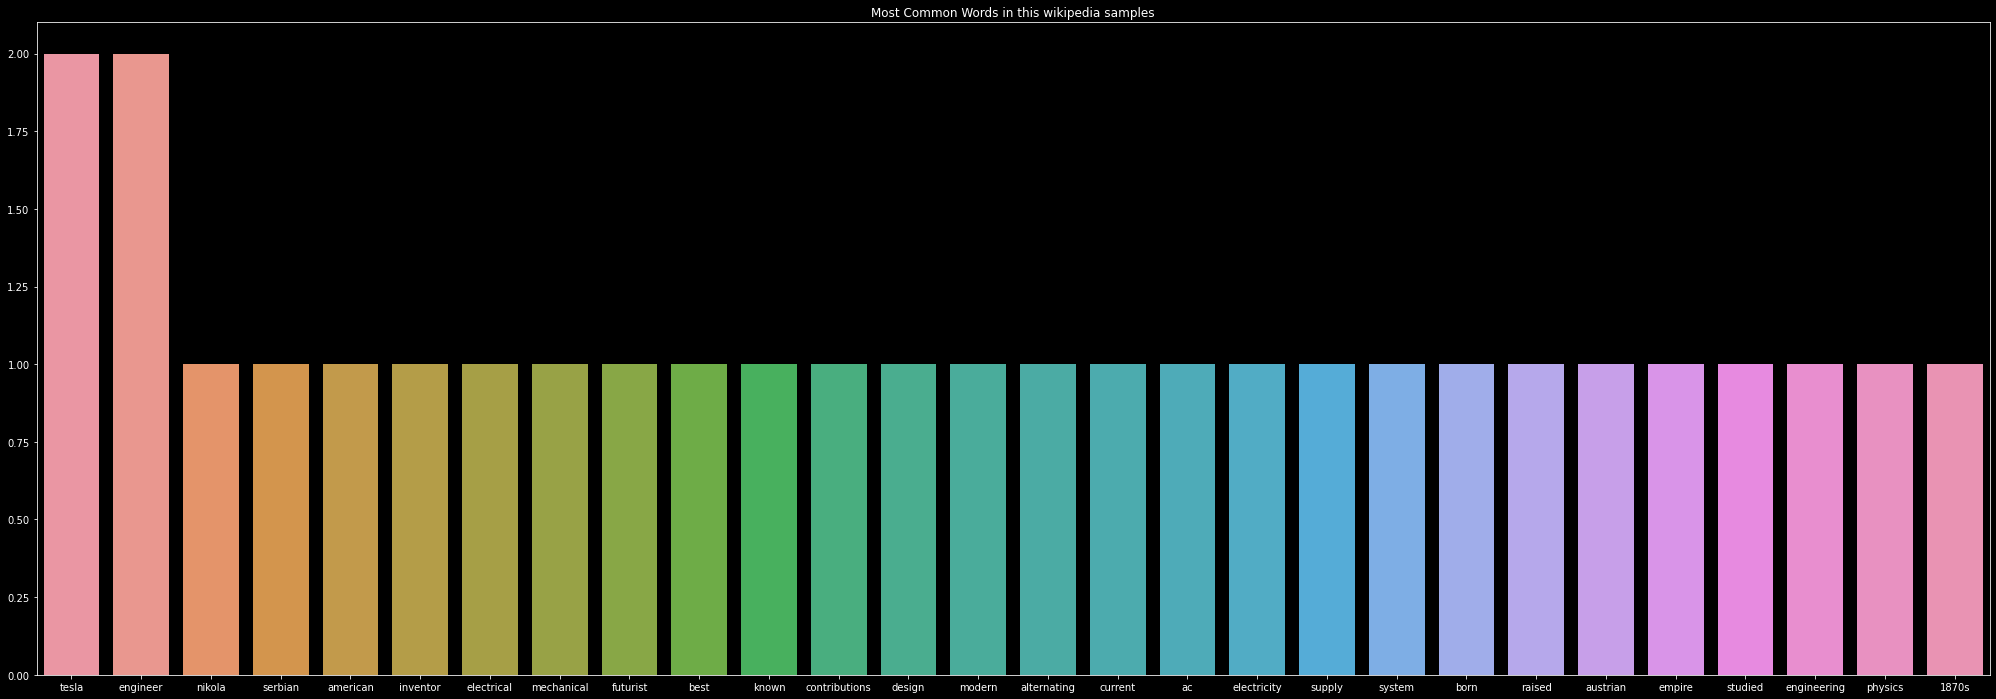

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(35, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

On comprend directement ici les thèmes de l'article étudié

# Wordcloud

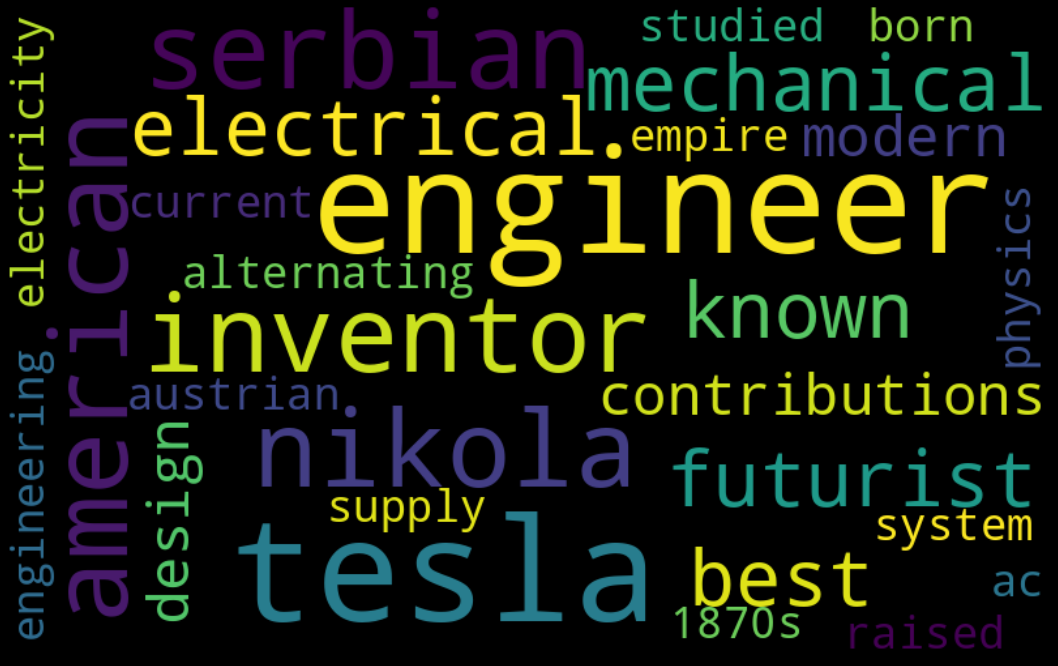

In [24]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(t_p.text)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off'); #le point virgule enleve des coordonnées qui s'affichent

Ici encore, les stopwords nous empêchent d'y voir clair

sans les stopwords ...

In [25]:
text_without_stopwords = t_p.without_stopwords_concatenated()

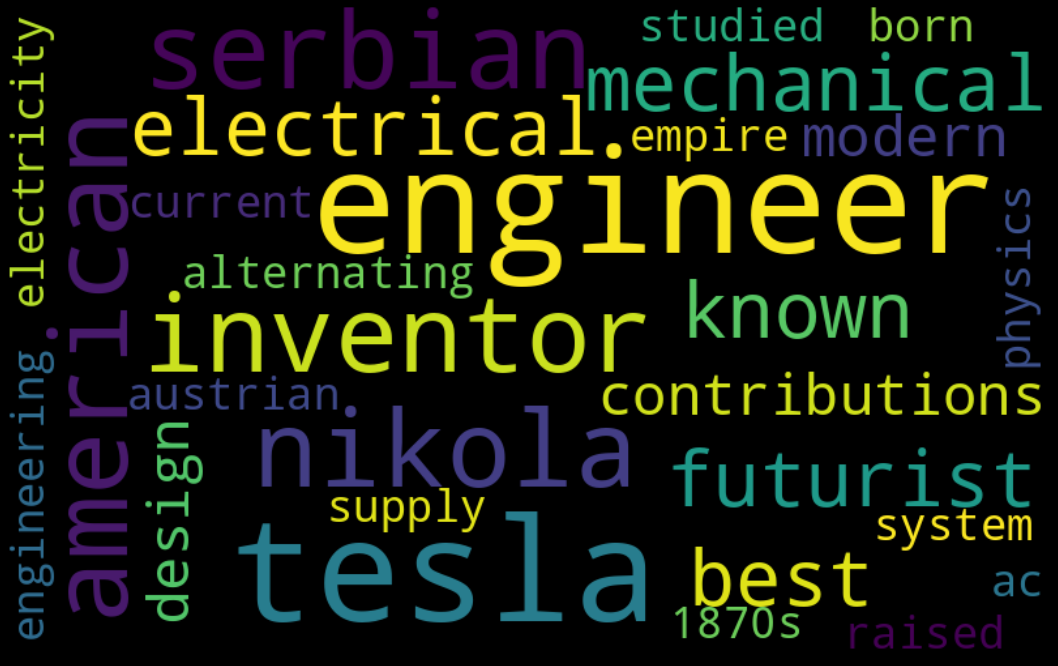

In [26]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(t_p.text_without_stopwords)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off'); #le point virgule enleve des coordonnées qui s'affichent

On obtient une sorte de 'résumé' de l'article, dont on trouve directement les grands thèmes 

# Word2vec

In [27]:
!python3 -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 2.0 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
e = v.Embedding(MODEL_NAME)

In [29]:
e.embedding(t_p.text)

In [30]:
words_embedding_dim_2 = e.pca()

In [31]:
words_embedding_dim_2.shape

(55, 2)

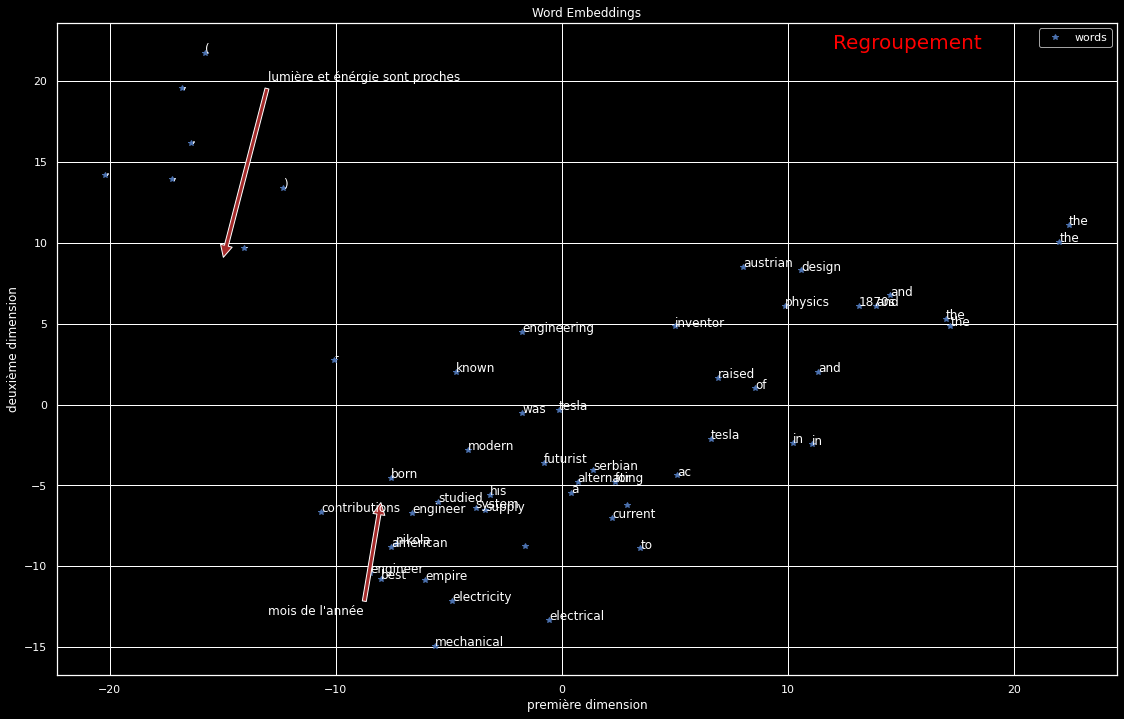

In [32]:
seaborn.set()
plt.style.use('dark_background')
plt.figure(figsize = (19, 12))

plt.plot(words_embedding_dim_2[:,0], words_embedding_dim_2[:,1], 'b', label = 'words', linewidth=0, marker = '*')

plt.title('Word Embeddings')
plt.xlabel('première dimension')
plt.ylabel('deuxième dimension')
plt.text(12, 22, 'Regroupement', c = 'red', animated = True, fontsize = 20)
plt.annotate('mois de l\'année', xy=(-8, -6), xytext=(-13, -13), 
arrowprops={'facecolor':'brown', 'shrink':0.01} )
plt.annotate('lumière et énérgie sont proches', xy=(-15, 9), xytext=(-13, 20), 
arrowprops={'facecolor':'brown', 'shrink':0.01} )
plt.legend()

plt.grid(True)

for i, w in enumerate(e.words):
    plt.annotate(w, xy=(words_embedding_dim_2[i, 0], words_embedding_dim_2[i, 1]))

plt.show()